Perform Webscraping to retrieve data to related to House Price Prediction

In [192]:

from selenium.webdriver.chrome.options import Options
import time
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
from selenium import webdriver
from selenium.common import StaleElementReferenceException, NoSuchElementException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# Set up Chrome options for headless mode
chrome_options = Options()
chrome_options.add_argument("--headless")  
chrome_options.add_argument("--disable-gpu")  
chrome_options.add_argument("--no-sandbox")  
chrome_options.add_argument("--disable-dev-shm-usage")  
chrome_options.add_argument("--window-size=1920,1080")
chrome_options.add_argument("--remote-debugging-port=9222")
chrome_options.add_argument("--disable-software-rasterizer")

# Set up the Chrome driver
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=chrome_options)

#Webscraping is performed from property listing website
url = 'https://www.quikr.com/homes/property/residential-apartments-for-sale-in-bangalore-cid_23?q=eyJwcm9wZXJ0eV90eXBlIjpbImFwIl0sImNsdXN0ZXJDaXR5IjpbIjIzIl0sImF2YWlsYWJsZV9mcm9tIjoiMCJ9'
driver.get(url)
#Maximise the browser window , so that all elements would be in view
driver.maximize_window()

#Initialise list variables to get dependendent and independent variables for Data Analysis
getBHK=[]
getPrice=[]
getTransaction=[]
getBuiltUpArea=[]
getAvailability=[]
getPostedDate=[]
getPostedBy=[]
getRera=[]
getArea=[]


In [193]:
#Function created to retrieve property details related to house price prediction
def getPropertyDetails():
    #xpath to get all elements, which retrieve bhk details
    bhk_elem=driver.find_elements(By.XPATH,"//div[@class='tophe']/h2/a")
    #xpath to get all elements, which retrieve price details
    price_elem=driver.find_elements(By.XPATH,"//div[@class='liprice' or @class='liprice cfp']//span")
    #xpath to get all elements, which retrieve transaction details
    transaction_elem=driver.find_elements(By.XPATH,"//li[contains(text(),'Transaction')]/span")
    #xpath to get all elements, which retrieve built up area details
    builtUpArea_elem=driver.find_elements(By.XPATH,"//li[contains(text(),'Built-Up Area')]/span")
    #xpath to get all elements, which retrieve availability details
    availability_elem=driver.find_elements(By.XPATH,"//li[contains(text(),'Availability')]/span")
    #xpath to get all elements, which retrieve posted date details
    posteddate_elem=driver.find_elements(By.XPATH,"//li[contains(text(),'Posted')]/span")
    #xpath to get all elements, which retrieve posted by details
    postedby_elem=driver.find_elements(By.XPATH,"//div[@class='nameclature']/div[@class='author-type']")
    #xpath to get all elements, which retrieve Rera Approval details
    rera_elem=driver.find_elements(By.XPATH,"//h3[@class='listloc']")
    
    for bhk_i,price_i,transaction_i,builtuparea_i,availability_i,posteddate_i,postedby_i,rera_i in zip(bhk_elem,price_elem,transaction_elem,builtUpArea_elem,availability_elem,posteddate_elem,postedby_elem,rera_elem):
        #retrieve bhk details of the property
        bhk=bhk_i.text
        bhklist=bhk.split('BHK')
        getBHK.append(bhklist[0].rstrip())

        #retrieve area details of the property
        arealist=bhk.split('in')
        getArea.append(arealist[1].rstrip())

        #retrieve price details of the property
        price=price_i.text
        getPrice.append(price)
        #retrieve transaction details of the property
        transaction=transaction_i.text
        getTransaction.append(transaction)
        #retrieve built up area details of the property
        builtuparea_complete=builtuparea_i.text
        builtuparea=builtuparea_complete.split('(')[0].strip()
        getBuiltUpArea.append(builtuparea)
        #retrieve availability details of the property
        availability=availability_i.text
        getAvailability.append(availability)
        #retrieve posted date details of the property
        posteddate=posteddate_i.text
        getPostedDate.append(posteddate)
        #retrieve posted by details of the property
        postedby=postedby_i.text
        getPostedBy.append(postedby)
        #retrieve rera details of the property
        try:
            rera_i.find_element(By.XPATH, ".//span[@class='rera']")
            getRera.append("Yes")  
        except:
            getRera.append("No")  


    next_button = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, "//a[contains(text(),'Next')]")))
    time.sleep(3)  # Pause to observe the action

    driver.execute_script("arguments[0].click();", next_button)
    time.sleep(5)
   



In [194]:

# Total days to process 
from tqdm import tqdm


total_pages = 100 
#Display the progress bar for the data retrieved from APOD api
with tqdm(total=total_pages, desc="Retrieving house price data") as show_progress:
    for num in range(0,total_pages):
        getPropertyDetails()
        show_progress.update(1)

print("The values are",getBHK)
print("The values are",getPrice)
print("The length are",getTransaction)
print("The values are",getBuiltUpArea)
print("The values are",getAvailability)
print("The values are",getPostedDate)
print("The values are",getPostedBy)
print("The values are",getRera)
print("The values are",getArea)

driver.quit()

Retrieving house price data: 100%|██████████| 100/100 [17:19<00:00, 10.40s/it]


The values are ['Semi Furnished 3', '3', '3', '3', '3', '2', '3', '3', '4', '3', '3', '2', '2', '3', '2', '3', '3', '4', '1', '2', '2', '2', '3', '4', '1', '4', '4', '2', '3', '2', '4+', '3', '2', '3', '3', '2', '4+', '2', '4+', '3', '3', '4+', '3', '3', '3', '3', '2', '3', '3', '2', '2', '4', '2', '3', '3', '4+', '4+', '4+', '3', '3', '4+', '3', '1', '4', '3', '3', '3', '1', '3', '3', '3', '4+', '4+', '4+', '3', '3', '4+', '3', '4+', '3', '3', '4+', '4+', '2', '2', '1', '3', '3', '2', '4', '1', '3', '3', '4+', '4+', '4+', '3', '4+', '3', '3', '2', '3', '2', '2', '3', '4', '2', '3', '3', '3', '2', '3', '3', '3', '3', '1', '2', '3', '2', '2', '3', '2', '3', '3', '2', '3', '4', '2', '3', '4', '3', '2', '4+', '2', '2', '4+', '2', '3', '1', '4+', '2', '3', '2', '3', '2', '3', '3', '3', '4', '3', '3', '2', '2', '1', '2', '2', '4', '3', '3', '3', '3', '3', '2', '2', '2', '3', '2', '3', '2', '4', '4', '3', '2', '4', '3', '3', '3', '1', '4', '4', '4', '2', '4', '2', '3', '2', '3', '3', '3', '1

In [195]:
import os
import pandas as pd
import csv
#Data related to house price prediction loaded from dataframe to csv file
try:
    #Convert the list of attributes to csv file
    outputFilename = os.path.join(os.getcwd(), 'Dataset','HousePrice.json')
    #Create the folder, if the folder is not present in the directory
    os.makedirs(os.path.dirname(outputFilename), exist_ok=True)
    #Create the file
    #with open(outputFilename,'w') as file:
    #    wr=csv.writer(file)

    #create Dataframe with columns for webscraped data
    df=pd.DataFrame(columns=['NumberOfBHK','Price','Transaction','BuiltUpArea','Availability','PostedDate','PostedBy','ReraApproved','AreaName'])
    #Assign the data to the 
    df['NumberOfBHK']=getBHK
    df['Price']=getPrice
    df['Transaction']=getTransaction
    df['BuiltUpArea']=getBuiltUpArea
    df['Availability']=getAvailability
    df['PostedDate']=getPostedDate
    df['PostedBy']=getPostedBy
    df['ReraApproved']=getRera
    df['AreaName']=getArea

    #write the data from dataframe to the file
    datasetFilepath= os.path.join('Dataset', 'HousePrice.json')
    df.to_json(datasetFilepath,orient='records',indent=4)
except Exception as e:
    print("Exception message: ",e)



The dataset webscraped from property listing website is stored to mongo DB

In [196]:
import json
# Function to read the configuration file
def read_config(filename):
    with open(filename, 'r') as file:
        config = json.load(file)
    return config

In [197]:
import os
from pymongo import MongoClient
import pandas as pd

# Load database credentials from the config file
config_path=os.path.join('config.json')
config=read_config(config_path)
conn=None

# Connect to MongoDB
client = MongoClient(config['DB_HOST_MONGO'])
db = client['HousePrice_data']
collection = db['HousePricePrediction']

# Load data from CSV
filepath = os.path.join('Dataset','HousePrice.json')
houseprice_data = pd.read_json(filepath)

# Convert DataFrame to dictionary
data_dict={}
data_dict = houseprice_data.to_dict(orient='records')

# Insert data into MongoDB
collection.delete_many({})
collection.insert_many(data_dict)
print("Data inserted successfully!")

# Fetch all the data from the collection
data_from_db = list(collection.find({}))

for record in data_from_db:
    print(record)

Data inserted successfully!
{'_id': ObjectId('6770781bd9790462631561d0'), 'NumberOfBHK': 'Semi Furnished 3', 'Price': '69.99 Lakh', 'Transaction': 'Resale', 'BuiltUpArea': '1228 Sq.Ft.', 'Availability': 'Ready To Move', 'PostedDate': '07-Dec-2024', 'PostedBy': 'Individual', 'ReraApproved': 'No', 'AreaName': ' Jigani, Bangalore at DLF Woodland Heights'}
{'_id': ObjectId('6770781bd9790462631561d1'), 'NumberOfBHK': '3', 'Price': '1.05 Crore', 'Transaction': 'Resale', 'BuiltUpArea': '1515 Sq.Ft.', 'Availability': 'Ready To Move', 'PostedDate': '13-Nov-2024', 'PostedBy': 'Individual', 'ReraApproved': 'Yes', 'AreaName': ' Thanisandra, Bangalore'}
{'_id': ObjectId('6770781bd9790462631561d2'), 'NumberOfBHK': '3', 'Price': '58 Lakhs', 'Transaction': 'New Property', 'BuiltUpArea': '1500 Sq.Ft.', 'Availability': 'Ready To Move', 'PostedDate': '16-Dec-2024', 'PostedBy': 'Individual', 'ReraApproved': 'No', 'AreaName': ' TC Palya, Bangalore'}
{'_id': ObjectId('6770781bd9790462631561d3'), 'NumberOfBH

In [198]:
#Top 5 locations with the highest house price



pipeline=[
    {
        '$addFields': {
            'normalized_price': {
                '$switch': {
                    'branches': [
                        {
                            'case': { '$regexMatch': { 'input': '$Price', 'regex': "Lakh?$" } },
                            'then': {
                                '$multiply': [
                                    { '$toDouble': { '$arrayElemAt': [ { '$split': [ '$Price', ' ' ] }, 0 ] } },
                                    100000
                                ]
                            }
                        },
                        {
                            'case': { '$regexMatch': { 'input': '$Price', 'regex': "Crore?$" } },
                            'then': {
                                '$multiply': [
                                    { '$toDouble': { '$arrayElemAt': [ { '$split': [ '$Price', ' ' ] }, 0 ] } },
                                    10000000
                                ]
                            }
                        }
                    ],
                    'default': 0
                }
            }
        }
    },
    {
        '$group': {
            '_id': '$AreaName',
            'max_price': { '$max': '$normalized_price' },
            'doc': { '$first': '$$ROOT' }
        }
    },
    {
        '$sort': { 'max_price': -1 }
    },
    {
        '$limit': 5
    }
]
results = collection.aggregate(pipeline)
# Print the results
print("Top 5 AreaName with Highest Price:")
for result in results:
    print(result)







Top 5 AreaName with Highest Price:
{'_id': ' Kodihalli, Bangalore.', 'max_price': 174899999.99999997, 'doc': {'_id': ObjectId('6770781bd9790462631568e6'), 'NumberOfBHK': '4', 'Price': '17.26 Crore', 'Transaction': 'New Property', 'BuiltUpArea': '5475 Sq.Ft.', 'Availability': 'Ready To Move', 'PostedDate': '26-Dec-2024', 'PostedBy': 'Broker', 'ReraApproved': 'No', 'AreaName': ' Kodihalli, Bangalore.', 'normalized_price': 172600000.00000003}}
{'_id': ' Malleshwaram, Bangalore.', 'max_price': 142000000.0, 'doc': {'_id': ObjectId('6770781bd979046263156382'), 'NumberOfBHK': '3', 'Price': '3.83 Crore', 'Transaction': 'New Property', 'BuiltUpArea': '3195 Sq.Ft.', 'Availability': 'Ready To Move', 'PostedDate': '26-Dec-2024', 'PostedBy': 'Broker', 'ReraApproved': 'No', 'AreaName': ' Malleshwaram, Bangalore.', 'normalized_price': 38300000.0}}
{'_id': ' Whitefield, Bangalore.', 'max_price': 122400000.0, 'doc': {'_id': ObjectId('6770781bd9790462631563be'), 'NumberOfBHK': '1', 'Price': '38.25 Lakh'

In [199]:
#Count of New Property vs Resale property
pipeline = [
    {
        '$group': {
            '_id': '$Transaction',  
            'count': { '$sum': 1 }  
        }
    },
    {
        '$project': {
            '_id': 0,  
            'Transaction': '$_id',
            'count': 1
        }
    }
]

# Execute the pipeline
results = collection.aggregate(pipeline)

# Print the results
print("Count of New Property vs Resale Property:")
for result in results:
    print(result)


Count of New Property vs Resale Property:
{'count': 1629, 'Transaction': 'New Property'}
{'count': 471, 'Transaction': 'Resale'}


In [200]:
#Fetch the record with most recent date and records with earliest date
pipeline = [
    {
        '$addFields': {
            'parsedDate': {
                '$dateFromString': {
                    'dateString': '$PostedDate',
                    'format': '%d-%b-%Y'
                }
            }
        }
    },
    {
        '$facet': {
            'mostRecent': [
                { '$sort': { 'parsedDate': -1 } },  # Sort by date in descending order
                { '$limit': 1 }  # Fetch the most recent record
            ],
            'earliest': [
                { '$sort': { 'parsedDate': 1 } },  # Sort by date in ascending order
                { '$limit': 1 }  # Fetch the earliest record
            ]
        }
    }
]

# Execute the pipeline
result = collection.aggregate(pipeline)

# Print the results
print("Most Recent and Earliest Records:")
for record in result:
    print(record)


Most Recent and Earliest Records:
{'mostRecent': [{'_id': ObjectId('6770781bd9790462631561eb'), 'NumberOfBHK': '2', 'Price': '6.40 Crore', 'Transaction': 'Resale', 'BuiltUpArea': '1096 Sq.Ft.', 'Availability': 'Ready To Move', 'PostedDate': '28-Dec-2024', 'PostedBy': 'Individual', 'ReraApproved': 'No', 'AreaName': ' Uttarahalli, Bangalore', 'parsedDate': datetime.datetime(2024, 12, 28, 0, 0)}], 'earliest': [{'_id': ObjectId('6770781bd9790462631565c2'), 'NumberOfBHK': '2', 'Price': '1.35 Crore', 'Transaction': 'New Property', 'BuiltUpArea': '1150 Sq.Ft.', 'Availability': 'Ready To Move', 'PostedDate': '07-Nov-2024', 'PostedBy': 'Broker', 'ReraApproved': 'No', 'AreaName': ' Electronic City Phase I, Bangalore', 'parsedDate': datetime.datetime(2024, 11, 7, 0, 0)}]}


EDA for House Price Prediction

In [201]:
import numpy as np
import seaborn as sns
import matplotlib as plt
#convert the data from collection to list
data_for_csv = list(collection.find())

#upload the data from list to dataframe
df=pd.DataFrame(data_for_csv)
df


,_id,NumberOfBHK,Price,Transaction,BuiltUpArea,Availability,PostedDate,PostedBy,ReraApproved,AreaName
0,6770781bd9790462631561d0,Semi Furnished 3,69.99 Lakh,Resale,1228 Sq.Ft.,Ready To Move,07-Dec-2024,Individual,No,"Jigani, Bangalore at DLF Woodland Heights"
1,6770781bd9790462631561d1,3,1.05 Crore,Resale,1515 Sq.Ft.,Ready To Move,13-Nov-2024,Individual,Yes,"Thanisandra, Bangalore"
2,6770781bd9790462631561d2,3,58 Lakhs,New Property,1500 Sq.Ft.,Ready To Move,16-Dec-2024,Individual,No,"TC Palya, Bangalore"
3,6770781bd9790462631561d3,3,1.80 Crore,Resale,1585 Sq.Ft.,Ready To Move,13-Dec-2024,Broker,No,"Electronic City Phase I, Bangalore"
4,6770781bd9790462631561d4,3,1.85 Crore,Resale,1536 Sq.Ft.,Ready To Move,06-Dec-2024,Individual,Yes,"Sarjapur, Bangalore"
...,...,...,...,...,...,...,...,...,...,...
2095,6770781bd9790462631569ff,3,1.18 Crore,New Property,1186 Sq.Ft.,Ready To Move,26-Dec-2024,Broker,No,"Vijaya Nagar, Bangalore"
2096,6770781bd979046263156a00,4,3.80 Crore,Resale,3125 Sq.Ft.,Ready To Move,26-Dec-2024,Broker,No,"Gunjur, Bangalore"
2097,6770781bd979046263156a01,2,72 Lakhs,Resale,1525 Sq.Ft.,Ready To Move,26-Dec-2024,Broker,No,"Sadaramangala, Bangalore"
2098,6770781bd979046263156a02,3,2.05 Crore,Resale,1675 Sq.Ft.,Ready To Move,26-Dec-2024,Broker,No,"Varthur, Bangalore"


In [202]:
#get the number of rows and columns in the dataset
df.shape

(2100, 10)

In [203]:
#Retrieve all the columns from the dataset
df.columns

Index(['_id', 'NumberOfBHK', 'Price', 'Transaction', 'BuiltUpArea',
       'Availability', 'PostedDate', 'PostedBy', 'ReraApproved', 'AreaName'],
      dtype='object')

In [204]:
#Retrieve the data type of all the columns in the database
df.dtypes

_id             object
NumberOfBHK     object
Price           object
Transaction     object
BuiltUpArea     object
Availability    object
PostedDate      object
PostedBy        object
ReraApproved    object
AreaName        object
dtype: object

Handling Missing Values

In [205]:
#find the missing values in the dataset
df.isnull().sum()


_id             0
NumberOfBHK     0
Price           0
Transaction     0
BuiltUpArea     0
Availability    0
PostedDate      0
PostedBy        0
ReraApproved    0
AreaName        0
dtype: int64

Data Manipulation

In [206]:
#Convert the columns Posted Date to datetime format
df['PostedDate'] = pd.to_datetime(df['PostedDate'])

In [207]:
#Convert the price column to numeric column
pricelist=[]
def convertPriceToNumeric(priceValue):
    if isinstance(priceValue,str):
        if 'Lakhs' in priceValue or 'Lakh' in priceValue:
            return int(round(float(priceValue.split(' ')[0])*100000))
        elif 'Crores' in priceValue or 'Crore' in priceValue:
            return int(round(float(priceValue.split(' ')[0])*10000000))
    return np.nan

df['Price']=df['Price'].apply(convertPriceToNumeric)
#Removes the non numeric values(in this case, it removes the value-'Contact for Price')
df.dropna(subset=['Price'],inplace=True)
df['Price']=df['Price'].astype(int)


In [208]:
#Convert built up area column to numeric column and update the values in a new column
df['BuiltUpArea_sqft']=df['BuiltUpArea'].str.split(' ').str[0]
df['BuiltUpArea_sqft']
#Existing column is dropped, as it is redundant
df.drop(columns=['BuiltUpArea'],axis=1,inplace=True)

In [209]:
print(df.shape)
#Clean AreaName column to display only the area names in Bangalore
df['AreaName']=df['AreaName'].str.split(', Bangalore').str[0]
#remove the records with AreaName which have only single character data
df=df[df['AreaName'].str.len()>1]
print(df.shape)

(2100, 10)
(2100, 10)


In [210]:
#Clean Number of BHK Column, to retain only numeric values
df['NumberOfBHK']=np.where(df['NumberOfBHK'].str.len()>2,df['NumberOfBHK'].str.split(' ').str[2],df['NumberOfBHK'])

In [211]:
#Delete the column _id and PostedDate
df.drop(columns=['_id','PostedDate'],inplace=True)
df

,NumberOfBHK,Price,Transaction,Availability,PostedBy,ReraApproved,AreaName,BuiltUpArea_sqft
0,3,6999000,Resale,Ready To Move,Individual,No,Jigani,1228
1,3,10500000,Resale,Ready To Move,Individual,Yes,Thanisandra,1515
2,3,5800000,New Property,Ready To Move,Individual,No,TC Palya,1500
3,3,18000000,Resale,Ready To Move,Broker,No,Electronic City Phase I,1585
4,3,18500000,Resale,Ready To Move,Individual,Yes,Sarjapur,1536
...,...,...,...,...,...,...,...,...
2095,3,11800000,New Property,Ready To Move,Broker,No,Vijaya Nagar,1186
2096,4,38000000,Resale,Ready To Move,Broker,No,Gunjur,3125
2097,2,7200000,Resale,Ready To Move,Broker,No,Sadaramangala,1525
2098,3,20500000,Resale,Ready To Move,Broker,No,Varthur,1675


In [212]:
import psycopg2
#Move from the data from dataframe to Postgres

try:
    # Connect to PostgreSQL
    conn = psycopg2.connect(
        host="localhost",
        database="postgres",
        user="postgres",
        password="Infy@123"
    )
    cur = conn.cursor()

    cur.execute("""CREATE TABLE IF NOT EXISTS PROPERTY_DATA (
                    NumberOfBHK VARCHAR(5), 
                    Price BIGINT, 
                    Transaction VARCHAR(50), 
                    Availability VARCHAR(50), 
                    PostedBy VARCHAR(50), 
                    ReraApproved BOOLEAN, 
                    AreaName VARCHAR(50), 
                    BuiltUpArea_sqft INT)""")

    # Insert DataFrame into PostgreSQL
    for index, row in df.iterrows():
        cur.execute("""
            INSERT INTO property_data (NumberOfBHK, Price, Transaction, Availability, PostedBy, ReraApproved, AreaName, BuiltUpArea_sqft)
            VALUES (%s, %s, %s, %s, %s, %s, %s, %s)
        """, (
            row['NumberOfBHK'],
            row['Price'],
            row['Transaction'],
            row['Availability'],
            row['PostedBy'],
            row['ReraApproved'],
            row['AreaName'],
            row['BuiltUpArea_sqft']
        ))

    print(cur.execute("""SELECT * FROM PROPERTY_DATA"""))
    rows = cur.fetchall()
    for row in rows:
        print(row)

    print(cur.execute("""DELETE FROM PROPERTY_DATA"""))
    # Commit changes
    conn.commit()
    print("Data inserted successfully!")

except Exception as e:
    print(f"An error occurred: {e}")

finally:
    if cur:
        cur.close()
    if conn:
        conn.close()

None
('3', 6999000, 'Resale', 'Ready To Move', 'Individual', False, ' Jigani', 1228)
('3', 10500000, 'Resale', 'Ready To Move', 'Individual', True, ' Thanisandra', 1515)
('3', 5800000, 'New Property', 'Ready To Move', 'Individual', False, ' TC Palya', 1500)
('3', 18000000, 'Resale', 'Ready To Move', 'Broker', False, ' Electronic City Phase I', 1585)
('3', 18500000, 'Resale', 'Ready To Move', 'Individual', True, ' Sarjapur', 1536)
('2', 9000000, 'Resale', 'Ready To Move', 'Individual', False, ' Yelahanka New Town', 1076)
('3', 8500000, 'Resale', 'Ready To Move', 'Broker', False, ' Bannerghatta Jigani Road', 1691)
('3', 12300000, 'New Property', 'Ready To Move', 'Broker', True, ' Hennur Bagalur Road', 1900)
('4', 27600000, 'New Property', 'Ready To Move', 'Broker', True, ' Thanisandra Ma', 2553)
('3', 20700000, 'New Property', 'Ready To Move', 'Broker', True, ' Chikkagubbi Village', 1899)
('3', 12500000, 'Resale', 'Ready To Move', 'Individual', False, ' Muthanallur', 1900)
('2', 7880000,

In [213]:
#Load the cleaned data to csv file
filepath = os.path.join('Dataset','Cleaned_HousePrice.csv')
area_coords = df.to_csv(filepath)

Visual Representation of dataset

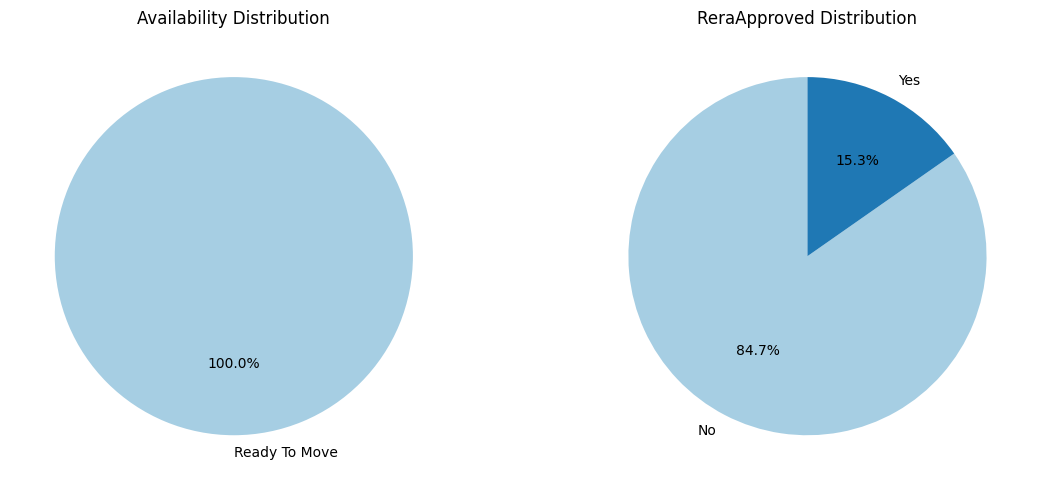

In [214]:
import matplotlib.pyplot as plt

# Columns visualised as pie chart
pie_columns = ['Availability', 'ReraApproved']

# Number of rows and columns for subplots
number_of_pie_cols = 2
number_of_pie_rows = -(-len(pie_columns) // number_of_pie_cols)  # Ceiling division

# Create subplots
fig, axes = plt.subplots(number_of_pie_rows, number_of_pie_cols, figsize=(12, number_of_pie_rows * 5))
axes = axes.flatten()

# Create pie charts for each column
for i, col in enumerate(pie_columns):
    pie_data = df[col].value_counts()
    axes[i].pie(
        pie_data, 
        labels=pie_data.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=plt.cm.Paired.colors
    )
    axes[i].set_title(f'{col} Distribution')

# Hide any unused subplots
for col in range(len(pie_columns), len(axes)):
    axes[col].set_visible(False)

plt.tight_layout()
plt.show()


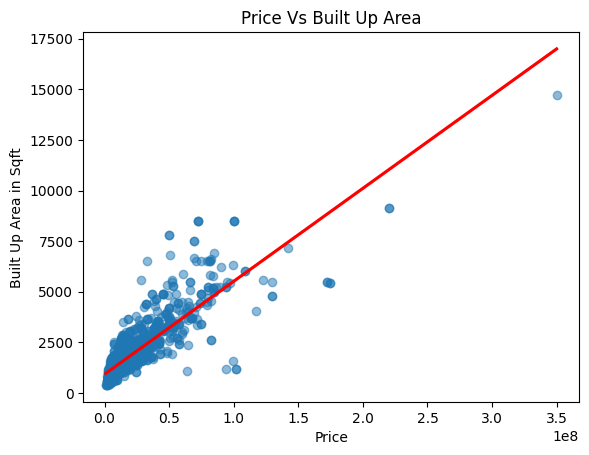

In [215]:
# 2. Scatter Plot for Price vs Built-Up Area
df['Price']=pd.to_numeric(df['Price'])
df['BuiltUpArea_sqft']=pd.to_numeric(df['BuiltUpArea_sqft'])
sns.regplot(data=df, x='Price', y='BuiltUpArea_sqft',
            scatter_kws={'alpha': 0.5},
            line_kws={'color': 'red'},
            ci=None)
plt.title('Price Vs Built Up Area')
plt.xlabel('Price')
plt.ylabel('Built Up Area in Sqft')
plt.show()



Data PreProcessing

In [216]:
from sklearn.preprocessing import *
#Modifying the categorical values to numerical values using label encoder
col_list=['NumberOfBHK','Transaction','Availability','PostedBy','ReraApproved','AreaName']

lb=LabelEncoder()
for col in col_list:
   df[col]=lb.fit_transform(df[col]) 

In [217]:
#Standardising the data
ss=StandardScaler()

df['Price']=ss.fit_transform(df[['Price']])
df['BuiltUpArea_sqft']=ss.fit_transform(df[['BuiltUpArea_sqft']])
df


,NumberOfBHK,Price,Transaction,Availability,PostedBy,ReraApproved,AreaName,BuiltUpArea_sqft
0,2,-0.485056,1,0,2,0,111,-0.430197
1,2,-0.319345,1,0,2,1,193,-0.178640
2,2,-0.541807,0,0,2,0,192,-0.191788
3,2,0.035647,1,0,0,0,63,-0.117285
4,2,0.059313,1,0,2,1,182,-0.160233
...,...,...,...,...,...,...,...,...
2095,2,-0.257813,0,0,0,0,202,-0.467010
2096,3,0.982292,1,0,0,0,72,1.232533
2097,1,-0.475542,1,0,0,0,178,-0.169875
2098,2,0.153977,1,0,0,0,199,-0.038399


In [218]:
from sklearn.model_selection import train_test_split
#Seperating the target and the feature columns
X=df.drop(columns='Price')
Y=df['Price']

#Splitting the data into training and testing dataset, using simple splitting
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
print(X)
print(Y)


      NumberOfBHK  Transaction  Availability  PostedBy  ReraApproved  \
0               2            1             0         2             0   
1               2            1             0         2             1   
2               2            0             0         2             0   
3               2            1             0         0             0   
4               2            1             0         2             1   
...           ...          ...           ...       ...           ...   
2095            2            0             0         0             0   
2096            3            1             0         0             0   
2097            1            1             0         0             0   
2098            2            1             0         0             0   
2099            2            1             0         0             0   

      AreaName  BuiltUpArea_sqft  
0          111         -0.430197  
1          193         -0.178640  
2          192         -0.1917

Modelling the data

In [219]:
import lightgbm as lgb
# Initialize the LightGBM Regressor
lgb_regressor = lgb.LGBMRegressor(
    boosting_type='gbdt',  # Gradient Boosting Decision Tree
    n_estimators=1000,     # Number of boosting rounds
    learning_rate=0.05,    # Learning rate
    max_depth=-1,          # No maximum depth (default)
    random_state=42
)

# Train the model
lgb_regressor.fit(X_train, Y_train,
                  eval_set=[(X_train, Y_train), (X_test, Y_test)],
                  eval_metric='rmse')
                  #early_stopping_rounds=50,  # Stops training if no improvement
                  #verbose=100)  # Print evaluation logs


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000478 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 1680, number of used features: 5
[LightGBM] [Info] Start training from score 0.009335


LGBMRegressor(learning_rate=0.05, n_estimators=1000, random_state=42)

In [220]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions
y_pred = lgb_regressor.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, y_pred)

# Print metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")


Mean Squared Error (MSE): 0.17134885545823836
Mean Absolute Error (MAE): 0.18666108982977425
Root Mean Squared Error (RMSE): 0.41394305823173116
R² Score: 0.7929335598809693


In [221]:
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from keras.layers import Dense, InputLayer,Dropout,BatchNormalization


np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)
#Applying neural network for modelling
input_shape = X_train.shape[1]
model=Sequential()
model.add(InputLayer(shape=(input_shape,)))
# Add the rest of the layers
model.add(Dense(units=16,activation='relu'))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=4,activation='relu'))
model.add(Dense(units=1,activation='linear'))



In [222]:
#Compile the model
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=[tf.keras.metrics.MeanAbsoluteError(name='mae'),
                        tf.keras.metrics.RootMeanSquaredError(name='rmse')])

In [223]:
#train the model
history=model.fit(X_train,Y_train,epochs=50,batch_size=5,validation_split=0.2)

Epoch 1/50
269/269 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 51.4898 - mae: 5.0724 - rmse: 6.7261 - val_loss: 0.5995 - val_mae: 0.5423 - val_rmse: 0.7743
Epoch 2/50
269/269 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9652 - mae: 0.5676 - rmse: 0.9667 - val_loss: 0.5331 - val_mae: 0.5111 - val_rmse: 0.7301
Epoch 3/50
269/269 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8617 - mae: 0.5326 - rmse: 0.9123 - val_loss: 0.3890 - val_mae: 0.4490 - val_rmse: 0.6237
Epoch 4/50
269/269 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6441 - mae: 0.4850 - rmse: 0.7915 - val_loss: 0.3245 - val_mae: 0.3892 - val_rmse: 0.5697
Epoch 5/50
269/269 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5480 - mae: 0.4407 - rmse: 0.7315 - val_loss: 0.2927 - val_mae: 0.3550 - val_rmse: 0.5410
Epoch 6/50
269/269 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4984 - mae: 0.4118 - rmse: 0.6982 - val_loss: 0.2760 - val_mae: 0.3313 - val_rmse: 0.5253
Epoch 7/50
269/269 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4556 - mae: 0.3865 - rmse

In [224]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
#evaluate the model
test_loss,test_mae,test_rsme=model.evaluate(X_test,Y_test)
print("Test loss:",test_loss)
print("Test mae:",test_mae)
print("Test RSME:",test_rsme)
y_pred=model.predict(X_test)
y_pred_binary=(y_pred>0.5).astype(int)

#Calculate regression metrics
mse=mean_squared_error(Y_test,y_pred)
mae=mean_absolute_error(Y_test,y_pred)  
rmse=np.sqrt(mse)  
r2score=r2_score(Y_test,y_pred)

print("Mean Squared Error",mse)
print("Mean Absolute Error",mae)
print("Root Mean Squared Error",rmse)
print("r2 score",r2score)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1916 - mae: 0.2560 - rmse: 0.4353
Test loss: 0.20561465620994568
Test mae: 0.2605297863483429
Test RSME: 0.45344752073287964
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Mean Squared Error 0.20561462934752597
Mean Absolute Error 0.26052975585731186
Root Mean Squared Error 0.45344749348466573
r2 score 0.7515251022743895
